# 경구피임약의 부작용으로 알려진 질환여성암은 정말 경구피임약과 유의미한 관계를 가질까?

# 수정
T-test 검정을 crosstab으로 바꾸어 유의미한지 알아보았다

 한눈에 비교하기 쉽게 하나의 figure에 경구피임약 복용한 경우, 복용하지 않은 경우 모두 나타내었다
 
 결론을 추가했다


In [1]:
import numpy as np
import numpy.random as random
import scipy as sp
import scipy.stats as stats
import pandas as pd
from pandas import Series, DataFrame

# 시각화 라이브러리
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# 소수점 3자리까지 표시
%precision 3
d19 = pd.read_csv('hn19_all.csv')
d18 = pd.read_csv('hn18_all.csv')
d17 = pd.read_csv('hn17_all.csv')
d16 = pd.read_csv('hn16_all.csv')
d15 = pd.read_csv('hn15_all.csv')
d14 = pd.read_csv('hn14_all.csv')
d13 = pd.read_csv('hn13_all.csv')
d12 = pd.read_csv('hn12_all.csv')
d11 = pd.read_csv('hn11_all.csv')
d10 = pd.read_csv('hn10_all.csv')

data = pd.concat([d19, d18,d17,d16,d15,d14,d13,d12,d11,d10])
d_F = data[data['sex']==2]
age_c = [(d_F.age >=60), 
        (d_F.age < 60) & (d_F.age >= 40), 
        (d_F.age < 40) &(d_F.age>=20) ]
age_list = [ '노년', '중년', '청년']
d_F['age_c'] = np.select(age_c, age_list, default = 'NaN')


C:\Users\seong\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (107,380,399,505,514,517,530,541) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\seong\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (146,436,555,570,572,587) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\seong\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (119,158,507,639,659) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
C:\Users\seong\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3071: DtypeWarning: Columns (455,461,586,643,678) have mixed types.Specify dtype option on import or set low_memo

In [2]:
D_F_G = d_F[['ID','sex','age','DC5_lt','DC4_lt','LW_pr','LW_oc','age_c']]

#여성질환 관련 데이터프래임 

drop_index_0 = D_F_G[D_F_G['age_c']=='NaN'].index
D_F_G_1 = D_F_G.drop(drop_index_0).dropna()


#데이터값 중에 모름에 해당하는 값, 9.0이 존재하는지 확인
D_F_G_SEE_1 = D_F_G_1['DC5_lt']== 9.0
D_F_G_SEE_1.sum()

#데이터값 중 모름에 해당하는 값 삭제
drop_index_2 = D_F_G_1[D_F_G_1['DC5_lt'] == 9.0 ].index
D_F_G_2 = D_F_G_1.drop(drop_index_2)
D_F_G_2
#데이터값 중 모름에 해당하는 값이 존재하는지 확인
D_F_G_SEE_2 = D_F_G_2['DC4_lt']== 9.0
D_F_G_SEE_2.sum()

#데이터값 중 모름에 해당하는 값 삭제
drop_index_3 = D_F_G_2[D_F_G_2['LW_pr'] == 9.0 ].index
D_F_G_3 = D_F_G_2.drop(drop_index_3)
D_F_G_3
drop_index_4 = D_F_G_3[D_F_G_3['LW_oc'] == 9.0 ].index
D_F_G_final = D_F_G_3.drop(drop_index_4)
D_F_G_final

D_F_G_final_Y = D_F_G_final[D_F_G_final['age_c'] =='청년']
D_F_G_final_M = D_F_G_final[D_F_G_final['age_c'] =='중년']
D_F_G_final_O = D_F_G_final[D_F_G_final['age_c'] =='노년']

In [3]:
#경구피임약을 섭취한 집단
OC_Y = D_F_G_final[D_F_G_final['LW_oc'] == 1.0]

#집단을 세대별로 나누기
OC_Y_young =OC_Y[OC_Y['age_c'] =='청년']
OC_Y_middle = OC_Y[OC_Y['age_c']=='중년']
OC_Y_old = OC_Y[OC_Y['age_c']=='노년']

OC_Y

,ID,sex,age,DC5_lt,DC4_lt,LW_pr,LW_oc,age_c
50,A108977505,2,66,0.0,0.0,1.0,1.0,노년
156,A110979902,2,42,0.0,0.0,1.0,1.0,중년
173,A111974902,2,62,0.0,0.0,1.0,1.0,노년
198,A111979702,2,60,0.0,0.0,1.0,1.0,노년
298,A114971702,2,63,0.0,0.0,1.0,1.0,노년
...,...,...,...,...,...,...,...,...
8882,P310800902,2,65,0.0,0.0,1.0,1.0,노년
8894,P311219802,2,54,0.0,0.0,1.0,1.0,중년
8898,P311259601,2,67,0.0,0.0,1.0,1.0,노년
8919,P311579804,2,71,1.0,0.0,1.0,1.0,노년


In [5]:
#경구피임약을 섭취하지 않은 집단
OC_N = D_F_G_final[D_F_G_final['LW_oc'] == 2.0]
#집단을 세대별로 나누기
OC_N_young = OC_N[OC_N['age_c'] =='청년']
OC_N_middle = OC_N[OC_N['age_c']=='중년']
OC_N_old = OC_N[OC_N['age_c']=='노년']


# 유방암과 경구피임약의 관계

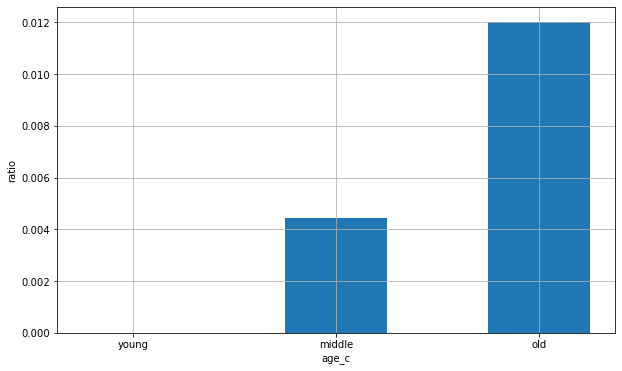

In [6]:
#유방암 비율(경구피임약을 섭취하였을때)
x = [1,2,3]
y = [OC_Y_young['DC4_lt'].mean(),OC_Y_middle['DC4_lt'].mean(),OC_Y_old['DC4_lt'].mean()]

# 그래프 크기 지정  
plt.figure(figsize = (10, 6))

plt.bar(x, y, align='center', width = 0.5)

# 막대 그래프의 각 레이블
plt.xticks(x, ['young', 'middle','old'])

# x와 y 레이블 설정
plt.xlabel('age_c')
plt.ylabel('ratio')

# 그리드 표시
plt.grid(True)

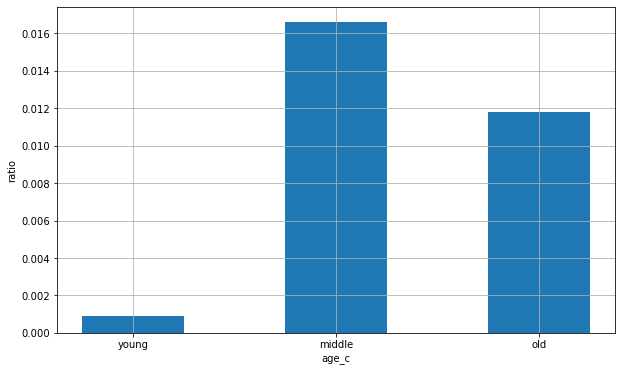

In [7]:
#유방암 비율(경구피임약 섭취하지 않았을때)

x = [1,2,3]
y = [OC_N_young['DC4_lt'].mean(),OC_N_middle['DC4_lt'].mean(),OC_N_old['DC4_lt'].mean()]

plt.figure(figsize = (10, 6))

plt.bar(x, y, align='center', width = 0.5)

plt.xticks(x, ['young', 'middle','old'])

plt.xlabel('age_c')
plt.ylabel('ratio')

plt.grid(True)

# 그래프수정

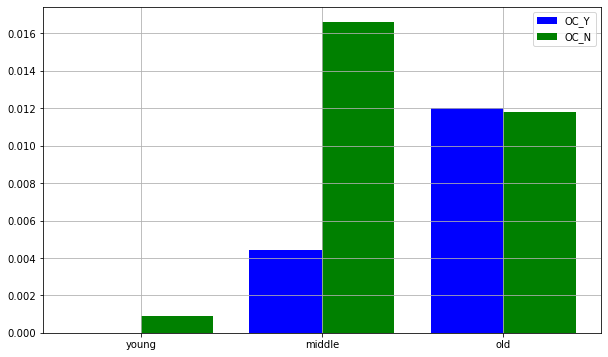

In [8]:
# 데이터 생성
y1 = np.array([OC_Y_young['DC4_lt'].mean(),OC_Y_middle['DC4_lt'].mean(),OC_Y_old['DC4_lt'].mean()])
y2 = np.array([OC_N_young['DC4_lt'].mean(),OC_N_middle['DC4_lt'].mean(),OC_N_old['DC4_lt'].mean()])

# X축 데이터
x = np.arange(len(y1))
#변수세개 똑같은 길이로 나두는거

# 그래프 너비
w = 0.4

# 그래프 크기 지정
plt.figure(figsize = (10, 6))

# 그래프 출력. y2는 막대의 너비만큼 오른쪽으로 이동시켜 그림
plt.bar(x, y1, color = 'blue', width = w, label = 'OC_Y', align = 'center')
plt.bar(x + w, y2, color='green', width = w, label = 'OC_N', align = 'center')
#X+W는 엑스축으로 W만큼 이동 안하면 겹쳐짐

# 최적 위치에 범례 배치
plt.legend(loc = 'best')

plt.xticks(x + w / 2, ['young', 'middle', 'old'])
plt.grid(True)

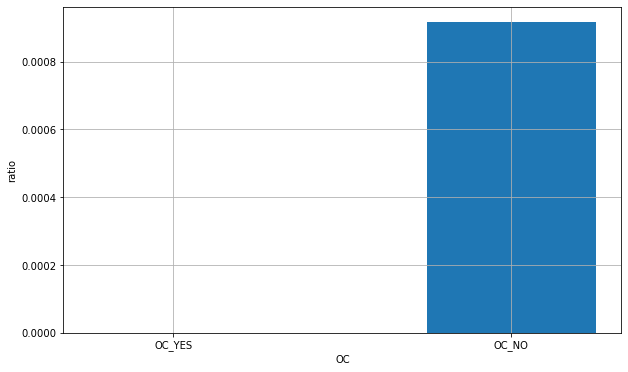

In [9]:
#청년 유방암 비율
x = [1,2]
y = [OC_Y_young['DC4_lt'].mean(),OC_N_young['DC4_lt'].mean()]

# 그래프 크기 지정  
plt.figure(figsize = (10, 6))

plt.bar(x, y, align='center', width = 0.5)

# 막대 그래프의 각 레이블
plt.xticks(x, ['OC_YES', 'OC_NO'])

# x와 y 레이블 설정
plt.xlabel('OC')
plt.ylabel('ratio')

# 그리드 표시
plt.grid(True)

In [10]:
#유의미한지 분석
crosstab = pd.crosstab(D_F_G_final_Y.LW_oc, D_F_G_final_Y.DC4_lt)
stats.chi2_contingency(crosstab)

(2.0542148982515958,
 0.1517854749214734,
 1,
 array([[1.079e+02, 9.000e-02],
        [1.091e+03, 9.100e-01]]))

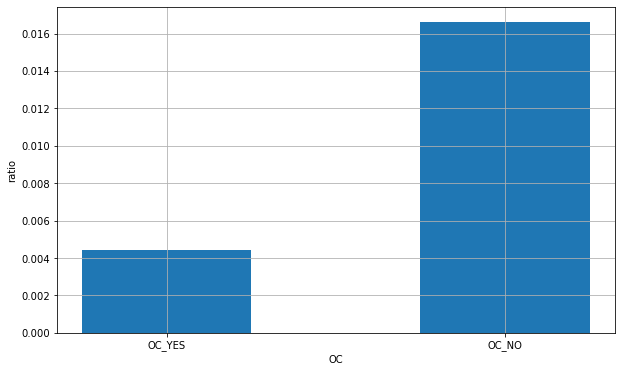

In [11]:
#중년 유방암 비율
x = [1,2]
y = [OC_Y_middle['DC4_lt'].mean(),OC_N_middle['DC4_lt'].mean()]

# 그래프 크기 지정  
plt.figure(figsize = (10, 6))

plt.bar(x, y, align='center', width = 0.5)

# 막대 그래프의 각 레이블
plt.xticks(x, ['OC_YES', 'OC_NO'])

# x와 y 레이블 설정
plt.xlabel('OC')
plt.ylabel('ratio')

# 그리드 표시
plt.grid(True)

In [12]:
#유의미한지 분석
crosstab = pd.crosstab(D_F_G_final_M.LW_oc, D_F_G_final_M.DC4_lt)
stats.chi2_contingency(crosstab)

(1.2024198821003185,
 0.2728385577375625,
 1,
 array([[ 221.661,    3.339],
        [1305.339,   19.661]]))

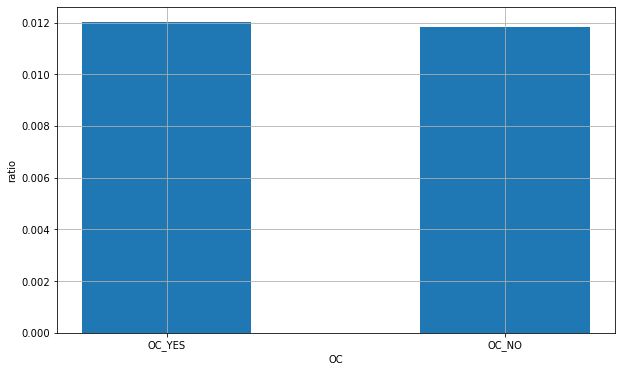

In [13]:
# 노년 유방암 비율
x = [1,2]
y = [OC_Y_old['DC4_lt'].mean(),OC_N_old['DC4_lt'].mean()]

# 그래프 크기 지정  
plt.figure(figsize = (10, 6))

plt.bar(x, y, align='center', width = 0.5)

# 막대 그래프의 각 레이블
plt.xticks(x, ['OC_YES', 'OC_NO'])

# x와 y 레이블 설정
plt.xlabel('OC')
plt.ylabel('ratio')

# 그리드 표시
plt.grid(True)

In [14]:
#유의미한지 분석
crosstab = pd.crosstab(D_F_G_final_O.LW_oc, D_F_G_final_O.DC4_lt)
stats.chi2_contingency(crosstab)

(0.06963299561932686,
 0.7918718890537823,
 1,
 array([[ 329.047,    3.953],
        [1002.953,   12.047]]))

# 자궁경부암과 경구피임약의 관계

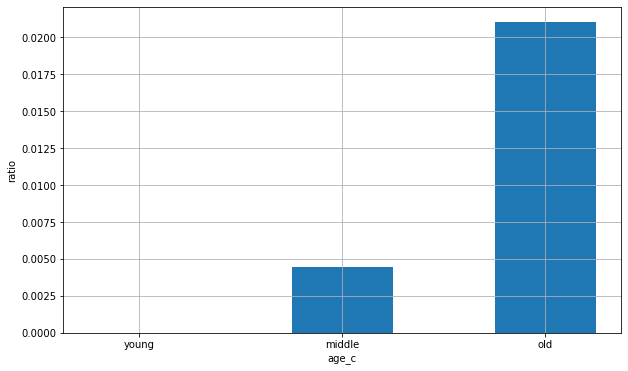

In [15]:
#자궁경부암 비율(경구피임약 섭취)
x = [1,2,3]
y = [OC_Y_young['DC5_lt'].mean(),OC_Y_middle['DC5_lt'].mean(),OC_Y_old['DC5_lt'].mean()]

# 그래프 크기 지정  
plt.figure(figsize = (10, 6))

plt.bar(x, y, align='center', width = 0.5)

# 막대 그래프의 각 레이블
plt.xticks(x, ['young', 'middle','old'])

# x와 y 레이블 설정
plt.xlabel('age_c')
plt.ylabel('ratio')

# 그리드 표시
plt.grid(True)

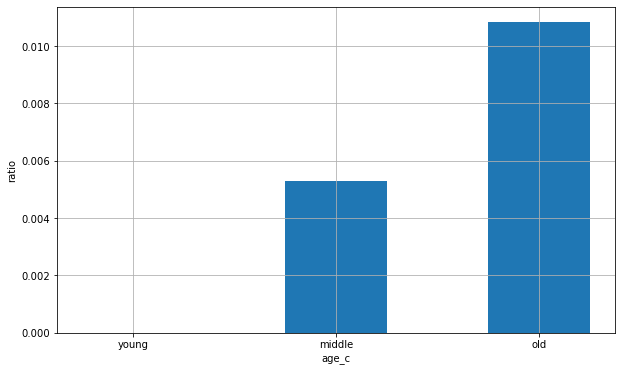

In [16]:
#자궁경부암 비율(경구피임약 섭취하지 않았을때)
x = [1,2,3]
y = [OC_N_young['DC5_lt'].mean(),OC_N_middle['DC5_lt'].mean(),OC_N_old['DC5_lt'].mean()]

plt.figure(figsize = (10, 6))

plt.bar(x, y, align='center', width = 0.5)

plt.xticks(x, ['young', 'middle','old'])

plt.xlabel('age_c')
plt.ylabel('ratio')

plt.grid(True)

# 그래프수정

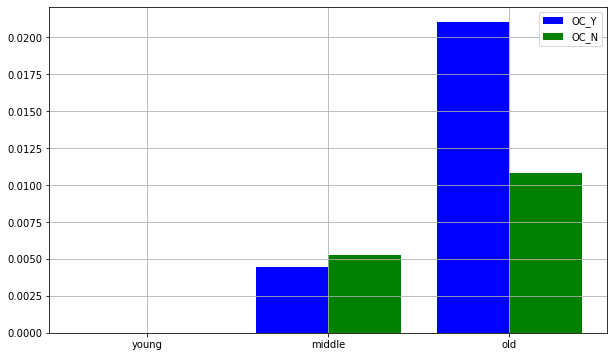

In [17]:
# 데이터 생성
y1 = np.array([OC_Y_young['DC5_lt'].mean(),OC_Y_middle['DC5_lt'].mean(),OC_Y_old['DC5_lt'].mean()])
y2 = np.array([OC_N_young['DC5_lt'].mean(),OC_N_middle['DC5_lt'].mean(),OC_N_old['DC5_lt'].mean()])

# X축 데이터
x = np.arange(len(y1))
#변수세개 똑같은 길이로 나두는거

# 그래프 너비
w = 0.4

# 그래프 크기 지정
plt.figure(figsize = (10, 6))

# 그래프 출력. y2는 막대의 너비만큼 오른쪽으로 이동시켜 그림
plt.bar(x, y1, color = 'blue', width = w, label = 'OC_Y', align = 'center')
plt.bar(x + w, y2, color='green', width = w, label = 'OC_N', align = 'center')
#X+W는 엑스축으로 W만큼 이동 안하면 겹쳐짐

# 최적 위치에 범례 배치
plt.legend(loc = 'best')

plt.xticks(x + w / 2, ['young', 'middle', 'old'])
plt.grid(True)

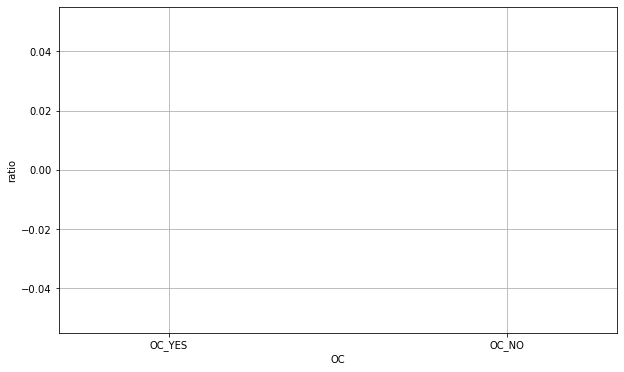

In [18]:
#청년 자궁경부암 비율
x = [1,2]
y = [OC_Y_young['DC5_lt'].mean(),OC_N_young['DC5_lt'].mean()]

# 그래프 크기 지정  
plt.figure(figsize = (10, 6))

plt.bar(x, y, align='center', width = 0.5)

# 막대 그래프의 각 레이블
plt.xticks(x, ['OC_YES', 'OC_NO'])

# x와 y 레이블 설정
plt.xlabel('OC')
plt.ylabel('ratio')

# 그리드 표시
plt.grid(True)

In [19]:
crosstab = pd.crosstab(D_F_G_final_Y.LW_oc, D_F_G_final_Y.DC5_lt)
stats.chi2_contingency(crosstab)

(0.000,
 1.000,
 0,
 array([[ 108.],
        [1092.]]))

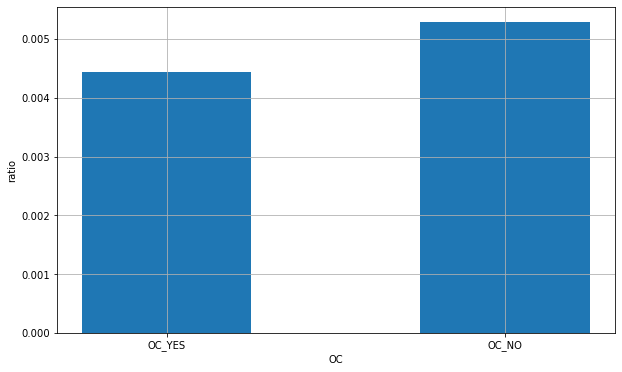

In [20]:
#중년 자궁경부암 비율
x = [1,2]
y = [OC_Y_middle['DC5_lt'].mean(),OC_N_middle['DC5_lt'].mean()]

# 그래프 크기 지정  
plt.figure(figsize = (10, 6))

plt.bar(x, y, align='center', width = 0.5)

# 막대 그래프의 각 레이블
plt.xticks(x, ['OC_YES', 'OC_NO'])
# x와 y 레이블 설정
plt.xlabel('OC')
plt.ylabel('ratio')

# 그리드 표시
plt.grid(True)

In [21]:
crosstab = pd.crosstab(D_F_G_final_M.LW_oc, D_F_G_final_M.DC5_lt)
stats.chi2_contingency(crosstab)

(0.11616560213395977,
 0.7332309976553528,
 1,
 array([[2.238e+02, 1.161e+00],
        [1.318e+03, 6.839e+00]]))

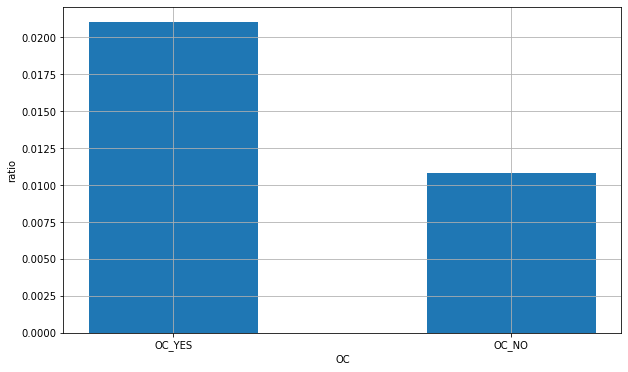

In [22]:
#노년 자궁경부암 비율
x = [1,2]
y = [OC_Y_old['DC5_lt'].mean(),OC_N_old['DC5_lt'].mean()]

# 그래프 크기 지정  
plt.figure(figsize = (10, 6))

plt.bar(x, y, align='center', width = 0.5)

# 막대 그래프의 각 레이블
plt.xticks(x, ['OC_YES', 'OC_NO'])

# x와 y 레이블 설정
plt.xlabel('OC')
plt.ylabel('ratio')

# 그리드 표시
plt.grid(True)

In [23]:
crosstab = pd.crosstab(D_F_G_final_O.LW_oc, D_F_G_final_O.DC5_lt)
stats.chi2_contingency(crosstab)

(1.2764024876512994,
 0.25856900493630447,
 1,
 array([[ 328.553,    4.447],
        [1001.447,   13.553]]))

# 자궁경부암과 경구피임약의 관계-2

In [24]:
#암에 걸린 집단에서 피임약을 복용한 비율
D_F_G_Y = D_F_G_final[D_F_G_final['DC5_lt'] == 1.0]
D_F_G_Y[D_F_G_Y['LW_oc'] == 2.0] = 0.0
D_F_G_Y['LW_oc'].mean()

<ipython-input-24-438a6a9baebb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D_F_G_Y[D_F_G_Y['LW_oc'] == 2.0] = 0.0
C:\Users\seong\anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


0.308

(-1.11427390140732, 1.199717050466078, -1.1181566223262358, 1.1602927609830176)

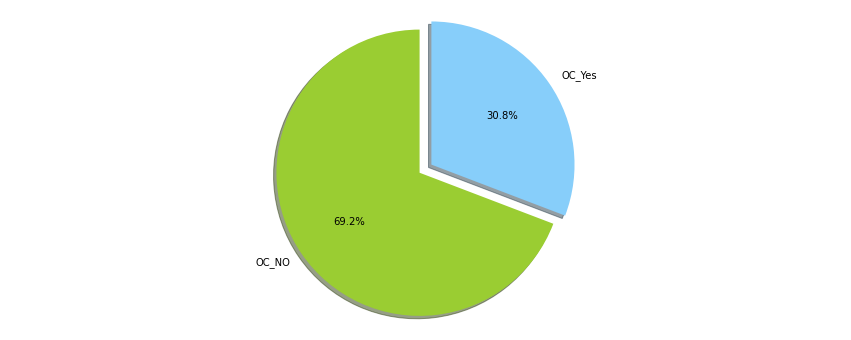

In [25]:
labels = ['OC_NO','OC_Yes']
sizes = [69.2, 30.8]
colors = ['yellowgreen', 'lightskyblue']
explode = (0, 0.1) 


# 그래프 크기 지정
plt.figure(figsize = (15, 6))

# 그래프 출력
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)




# 원을 그림
plt.axis('equal')


In [26]:
#암에 걸리지 않은 집단에서 피임약을 복용한 비율
D_F_G_Y = D_F_G_final[D_F_G_final['DC5_lt'] == 0.0]
D_F_G_Y[D_F_G_Y['LW_oc'] == 2.0] = 0.0
D_F_G_Y['LW_oc'].mean()

<ipython-input-26-2b0f75ad56aa>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  D_F_G_Y[D_F_G_Y['LW_oc'] == 2.0] = 0.0


0.162

(-1.1059846145917, 1.1065876903209801, -1.1098595615243712, 1.1919542270090289)

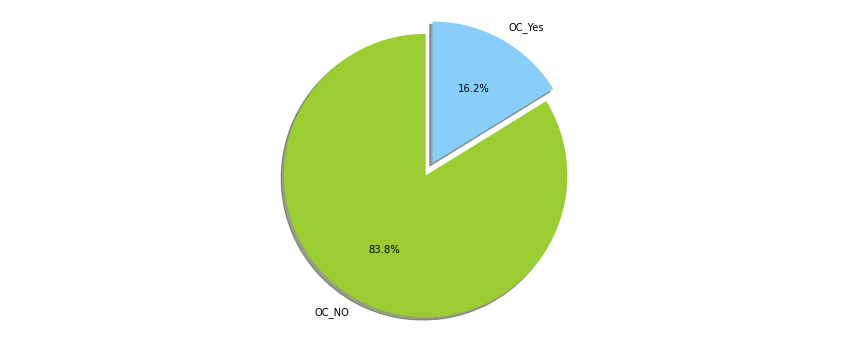

In [27]:
labels = ['OC_NO','OC_Yes']
sizes = [83.8, 16.2]
colors = ['yellowgreen', 'lightskyblue']
explode = (0, 0.1) 


# 그래프 크기 지정
plt.figure(figsize = (15, 6))

# 그래프 출력
plt.pie(sizes, explode = explode, labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)




# 원을 그림
plt.axis('equal')


# 자궁경부암과 경구피임약의 관계(추가변수:성행위)

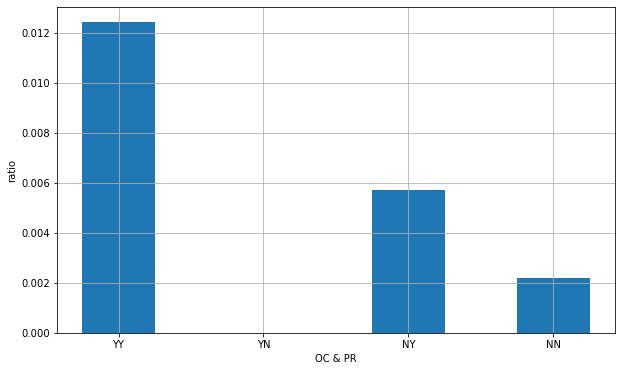

In [28]:
#임신한 경우와 임신하지 않은 경우(성행위라는 변수대체)

#경구피임약을 섭취 임신YES
OC_Y_Y = D_F_G_final[(D_F_G_final['LW_oc'] == 1.0) & (D_F_G_final['LW_pr'] == 1.0)]
OC_Y_Y['DC5_lt'].mean()

#경구피임약 섭취 임신NO
OC_Y_N = D_F_G_final[(D_F_G_final['LW_oc'] == 1.0) & (D_F_G_final['LW_pr'] == 2.0)]
OC_Y_N['DC5_lt'].mean()

#경구피임약을 섭취X 임신YES
OC_N_Y = D_F_G_final[(D_F_G_final['LW_oc'] == 2.0) & (D_F_G_final['LW_pr'] == 1.0)]
OC_N_Y['DC5_lt'].mean()

#경구피임약 섭취X 임신NO
OC_N_N = D_F_G_final[(D_F_G_final['LW_oc'] == 2.0) & (D_F_G_final['LW_pr'] == 2.0)]
OC_N_N['DC5_lt'].mean()

#시각화
x = [1,2,3,4]
y = [OC_Y_Y['DC5_lt'].mean(),OC_Y_N['DC5_lt'].mean(),OC_N_Y['DC5_lt'].mean(),OC_N_N['DC5_lt'].mean()]

plt.figure(figsize = (10, 6))

plt.bar(x, y, align='center', width = 0.5)

plt.xticks(x, ['YY', 'YN', 'NY','NN'])

plt.xlabel('OC & PR')
plt.ylabel('ratio')

plt.grid(True)

# 결론

crosstab으로 분석해보았을 때 모두 p값이 0.05이상으로 모든 세대에서 경구피임약과 여성암이 유의미한 관계를 가진다고 볼 수 없다.
하지만, 이 데이터는 경구피임약의 복용횟수에 상관없이 복용여부에 대한 정보만 있기 때문에(복용횟수, 달수 정보에 대한 컬럼도 있지만, 이에 응답한 집단이 매우 적어 분석할 수 없는 수준이었다.) 더욱 정확한 상관관계를 구하는데 어려움이 있었으며, 또한 전체 데이터양에 비해 경구피임약의 복용한 집단과 여성암의 유병경험이 있는 집단에 대한 데이터의 크기가 적어서 생긴 문제라고 생각한다.
따라서 다음기회에 조금 더 적합한 데이터셋을 찾아 복용여부, 복용횟수, 복용기간 등 많은 변수에 대해서 분석해보고 싶다.